# Creating DataFrames

Specify values for each column

In [7]:
import pandas as pd

data = {
    'Day': ['Mon', 'Tue', 'Wed', 'Thu', 'Fri'],
    'Vehicle_Count': [100, 120, 130, 140, 150],
    'Accidents': [1, 0, 2, 1, 0]
}
df = pd.DataFrame(data, index=['A', 'B', 'C', 'D', 'E'])
print(df)

   Day  Vehicle_Count  Accidents
A  Mon            100          1
B  Tue            120          0
C  Wed            130          2
D  Thu            140          1
E  Fri            150          0


Specify values for each row

In [2]:
import pandas as pd

# Define data row-wise
data = [
    ['Mon', 100, 1],
    ['Tue', 120, 0],
    ['Wed', 130, 2],
    ['Thu', 140, 1],
    ['Fri', 150, 0]
]

# Create DataFrame and specify column names
df = pd.DataFrame(data, columns=['Day', 'Vehicle_Count', 'Accidents'], index=[1,2,3,4,5])

print(df)

   Day  Vehicle_Count  Accidents
1  Mon            100          1
2  Tue            120          0
3  Wed            130          2
4  Thu            140          1
5  Fri            150          0


Create DataFrame with a MultiIndex/Hierarchical index

In [5]:
import pandas as pd

# Step 1: Define the data for each column (like normal)
df = pd.DataFrame(
    {
        "a": [4, 5, 6],
        "b": [7, 8, 9],
        "c": [10, 11, 12]
    }, index=pd.MultiIndex.from_tuples([('d',1),('d',2),('e',2)], names=['n', 'v']))

print(df)

     a  b   c
n v          
d 1  4  7  10
  2  5  8  11
e 2  6  9  12


Accessing Data in MultiIndex

In [8]:
print(df.loc[('d',1)])      #Row where n='d' and v=1
print(df.loc[('e',2)])      #Row where n='e' and v=2

a     4
b     7
c    10
Name: (d, 1), dtype: int64
a     6
b     9
c    12
Name: (e, 2), dtype: int64


# Reshaping Data

#### 1. `pd.melt(df)` – Gather columns into rows  
Purpose: Converts wide data into long data.

In [9]:
import pandas as pd

df = pd.DataFrame({
    'Name': ['Alice', 'Bob'],
    'Math': [90, 80],
    'Science': [85, 95]
})
df

,Name,Math,Science
0,Alice,90,85
1,Bob,80,95


In [11]:
melted = pd.melt(
    df,
    id_vars=['Name'],            # The column to keep fixed
    var_name='Subject',          # New column name for old column headers (Math, Science)
    value_name='Score'           # New column name for values under Math/Science
)

melted

,Name,Subject,Score
0,Alice,Math,90
1,Bob,Math,80
2,Alice,Science,85
3,Bob,Science,95


#### `2. df.pivot(columns='var', values='val')` – Spread rows into columns

In [12]:
import pandas as pd

data = {
    'Salesperson': ['Alice', 'Alice', 'Bob', 'Bob', 'Charlie', 'Charlie'],
    'Month': ['Jan', 'Feb', 'Jan', 'Feb', 'Jan', 'Feb'],
    'Sales': [250, 300, 200, 220, 150, 180]
}

df = pd.DataFrame(data)
print(df)


  Salesperson Month  Sales
0       Alice   Jan    250
1       Alice   Feb    300
2         Bob   Jan    200
3         Bob   Feb    220
4     Charlie   Jan    150
5     Charlie   Feb    180


In [15]:
df_pivot=df.pivot(index='Salesperson', columns='Month', values='Sales')
print(df_pivot)

Month        Feb  Jan
Salesperson          
Alice        300  250
Bob          220  200
Charlie      180  150


#### 3. `pd.concat([df1, df2])` – Append rows

In [16]:
import pandas as pd

# Data for Day 1 orders
df1 = pd.DataFrame({
    'OrderID': [1, 2],
    'Coffee': ['Latte', 'Espresso'],
    'Pastry': ['Croissant', 'Muffin']
})

print(df1)

# Data for Day 2 orders
df2 = pd.DataFrame({
    'OrderID': [3, 4],
    'Coffee': ['Cappuccino', 'Americano'],
    'Pastry': ['Donut', 'Scone']
})

print(df2)

   OrderID    Coffee     Pastry
0        1     Latte  Croissant
1        2  Espresso     Muffin
   OrderID      Coffee Pastry
0        3  Cappuccino  Donut
1        4   Americano  Scone


concatenate two dataframe by appending rows

In [17]:
df_combined=pd.concat([df1, df2])
print(df_combined)

   OrderID      Coffee     Pastry
0        1       Latte  Croissant
1        2    Espresso     Muffin
0        3  Cappuccino      Donut
1        4   Americano      Scone


####  4. `pd.concat([df1, df2], axis=1)` – Append columns  
Combines DataFrames horizontally (column-wise).

In [27]:
import pandas as pd

# DataFrame 1: employee names and departments
df1 = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Department': ['HR', 'Finance', 'IT']
})

print(df1)
print()

# DataFrame 2: salaries and experience
df2 = pd.DataFrame({
    'Salary': [70000, 80000, 65000],
    'Experience': [5, 8, 3]
})

print(df2)
print()

# Concatenate df1 and df2 side by side (columns)
result = pd.concat([df1, df2], axis=1)

print(result)


      Name Department
0    Alice         HR
1      Bob    Finance
2  Charlie         IT

   Salary  Experience
0   70000           5
1   80000           8
2   65000           3

      Name Department  Salary  Experience
0    Alice         HR   70000           5
1      Bob    Finance   80000           8
2  Charlie         IT   65000           3


### Sorting, reindexing, renaming

In [31]:
import pandas as pd

data = {
    'mpg': [21, 35, 17],
    'y': [2010, 2015, 2012],
    'Length': [180, 190, 175],
    'Height': [55, 60, 57]
}

df = pd.DataFrame(data)
print(df)

   mpg     y  Length  Height
0   21  2010     180      55
1   35  2015     190      60
2   17  2012     175      57


Order rows by values of a column (low to high)

In [37]:
# Sort by mpg ascending
print(df.sort_values('mpg'))

   mpg     y  Length  Height
2   17  2012     175      57
0   21  2010     180      55
1   35  2015     190      60


Order rows by values of a column (high to low).

In [33]:
# Sort by mpg descending
print(df.sort_values('mpg', ascending=False))

   mpg     y  Length  Height
1   35  2015     190      60
0   21  2010     180      55
2   17  2012     175      57


Rename the columns of a DataFrame

In [34]:
# Rename column 'y' to 'year'
print(df.rename(columns={'y': 'year'}))

   mpg  year  Length  Height
0   21  2010     180      55
1   35  2015     190      60
2   17  2012     175      57


Sort the index of a DataFrame

In [35]:
# Sort by index (row labels)
print(df.sort_index())

   mpg     y  Length  Height
0   21  2010     180      55
1   35  2015     190      60
2   17  2012     175      57


Reset index of DataFrame to row numbers, moving
index to columns.

In [38]:
# Reset index (useful if index is custom)
print(df.reset_index())

   index  mpg     y  Length  Height
0      0   21  2010     180      55
1      1   35  2015     190      60
2      2   17  2012     175      57


Drop columns from DataFrame

In [39]:
# Drop columns Length and Height
print(df.drop(columns=['Length', 'Height']))

   mpg     y
0   21  2010
1   35  2015
2   17  2012


# Subset Observations - rows

1. `df[df.Length > 71]`  
Extract rows where the `Length` column is greater than 71.

In [40]:
import pandas as pd

df = pd.DataFrame({'Length': [70, 72, 68, 75], 'Height': [55, 60, 58, 62]})
subset = df[df.Length > 71]
print(subset)


   Length  Height
1      72      60
3      75      62


2. `df.drop_duplicates()`  
Remove duplicate rows (considering all columns).

In [43]:
df = pd.DataFrame({'A': [1, 1, 1, 2, 2], 'B': [3, 3, 5, 4, 4]})
unique = df.drop_duplicates()
print(unique)


   A  B
0  1  3
2  1  5
3  2  4


3. `df.sample(frac=0.5)`  
Randomly select 50% of rows.

In [47]:
df = pd.DataFrame({'A': range(10)})
print(df)
print()

sampled = df.sample(frac=0.5)
print(sampled)


   A
0  0
1  1
2  2
3  3
4  4
5  5
6  6
7  7
8  8
9  9

   A
7  7
1  1
9  9
8  8
5  5


4. `df.sample(n=10)`  
Randomly select exactly 10 rows (if the DataFrame has 10 or more rows).

In [52]:
df = pd.DataFrame({'A': range(20)})
sampled = df.sample(n=10)
print(sampled)


     A
4    4
2    2
18  18
9    9
3    3
14  14
19  19
10  10
11  11
15  15


5. `df.nlargest(n, 'value')`  
Select top n rows ordered by highest values in the 'value' colum

In [53]:
df = pd.DataFrame({'value': [10, 50, 20, 40, 30]})
top3 = df.nlargest(3, 'value')
print(top3)


   value
1     50
3     40
4     30


6. `df.nsmallest(n, 'value')`  
Select bottom n rows ordered by smallest values in 'value'.

In [54]:
df = pd.DataFrame({'value': [10, 50, 20, 40, 30]})
bottom2 = df.nsmallest(2, 'value')
print(bottom2)


   value
0     10
2     20


7. `df.head(n)`  
Select first n rows

In [55]:
df = pd.DataFrame({'A': range(10)})
print(df.head(3))


   A
0  0
1  1
2  2


8. `df.tail(n)`  
Select last n rows.

In [56]:
df = pd.DataFrame({'A': range(10)})
print(df.tail(3))


   A
7  7
8  8
9  9


# Subset Variables - columns

Select multiple columns with specific names.

In [61]:
import pandas as pd

df = pd.DataFrame({
    'width': [5, 6, 7],
    'length': [10, 15, 20],
    'species': ['A', 'B', 'C'],
    'color': ['red', 'blue', 'green']
})

subset = df[['width', 'length', 'species']]
print(subset)


   width  length species
0      5      10       A
1      6      15       B
2      7      20       C


Select single column with specific name.

In [59]:
# Using bracket notation
single_col = df['width']
print(single_col)

# Or using dot notation
single_col_dot = df.width
print(single_col_dot)


0    5
1    6
2    7
Name: width, dtype: int64
0    5
1    6
2    7
Name: width, dtype: int64


Select columns whose name matches regular expression regex.  
Use `.filter()` with the `regex` parameter to select columns whose names match a pattern.  


In [71]:
#select columns that contain the letter 'e'

filtered = df.filter(regex='e')
print(filtered)

#Explanation: Columns 'length' and 'species' contain the letter 'e'.

   length species
0      10       A
1      15       B
2      20       C


`df.column.isin(values)`  
Checks if each element in the column `df.column` is present in the list or set `values`.

In [72]:
import pandas as pd

df = pd.DataFrame({'fruits': ['apple', 'banana', 'cherry', 'date', 'fig']})
values = ['banana', 'fig', 'grape']

# Check which fruits are in the list `values`
print(df['fruits'].isin(values))


0    False
1     True
2    False
3    False
4     True
Name: fruits, dtype: bool


`pd.isnull(obj)`  
Checks if the given object obj (could be a single value, Series, or DataFrame) contains missing values `(NaN)`.

In [73]:
df = pd.DataFrame({'numbers': [1, 2, None, 4]})

# Check which values are NaN
print(pd.isnull(df['numbers']))


0    False
1    False
2     True
3    False
Name: numbers, dtype: bool



`pd.notnull(obj)`  
The opposite of `pd.isnull()`. Checks if the given object obj is not `NaN`.

In [74]:
# Check which values are NOT NaN
print(pd.notnull(df['numbers']))


0     True
1     True
2    False
3     True
Name: numbers, dtype: bool


`& , | , ^ , ~ , df.any() , df.all()`
These are logical and bitwise operators and pandas methods used for combining boolean conditions:

`&` = Logical AND

`|` = Logical OR

`^` = Logical XOR (exclusive OR)

`~` = Logical NOT (negation)

`df.any()`
Checks if any element is True along an axis. For example, in a DataFrame, it can check if any value in each column or row is True.

`df.all()`
Checks if all elements are True along an axis.

In [78]:
df = pd.DataFrame({
    'A': [True, False, True],
    'B': [False, False, True]
})

# Logical AND between two columns
print(df['A'] & df['B'])

# Logical OR between two columns
print(df['A'] | df['B'])

# Logical XOR between two columns
print(df['A'] ^ df['B'])

# Logical NOT of column A
print(~df['A'])

# Check if any value is True in each column
print(df.any())

# Check if all values are True in each column
print(df.all())


0    False
1    False
2     True
dtype: bool
0     True
1    False
2     True
dtype: bool
0     True
1    False
2    False
dtype: bool
0    False
1     True
2    False
Name: A, dtype: bool
A    True
B    True
dtype: bool
A    False
B    False
dtype: bool


# Using query

In [80]:
import pandas as pd

data = {
    'Length': [5, 10, 7, 12],
    'Width': [6, 9, 7, 5],
    'Name': ['abc1', 'def2', 'abc3', 'xyz4']
}

df = pd.DataFrame(data)
df


,Length,Width,Name
0,5,6,abc1
1,10,9,def2
2,7,7,abc3
3,12,5,xyz4


1. `df.query('Length > 7')`  
Filters rows where the `Length` column is greater than 7.

In [81]:
filtered_df = df.query('Length > 7')
print(filtered_df)

   Length  Width  Name
1      10      9  def2
3      12      5  xyz4


2. `df.query('Length > 7 and Width < 8')`  
Filters rows where `Length` is greater than 7 AND Width is less than 8.

In [83]:
filtered_df = df.query('Length > 7 and Width < 8')
print(filtered_df)

   Length  Width  Name
3      12      5  xyz4


3. `df.query('Name.str.startswith("abc")', engine='python')`  
Filters rows where the Name column starts with `"abc"`.  
Since string functions aren’t natively supported in `query()`, you use `engine='python'` to enable this.

In [84]:
filtered_df = df.query('Name.str.startswith("abc")', engine='python')
print(filtered_df)

   Length  Width  Name
0       5      6  abc1
2       7      7  abc3


# Method Chaining

Most pandas methods return a DataFrame so that
another pandas method can be applied to the result.
This improves readability of code.

In [97]:
import pandas as pd

data = {
    'ID': [1, 2, 3],
    'A': [100, 250, 300],
    'B': [200, 150, 400]
}

df = pd.DataFrame(data)
df


,ID,A,B
0,1,100,200
1,2,250,150
2,3,300,400


In [100]:
df_chained = (
    pd.melt(df, id_vars=['ID'])
      .rename(columns={'variable':'var', 'value':'val'})
      .query('val >= 200')
)
print(df_chained)


   ID var  val
1   2   A  250
2   3   A  300
3   1   B  200
5   3   B  400


# Subsets - rows and columns

In [102]:
import pandas as pd

data = {
    'a': [5, 15, 25, 35, 45],
    'b': [10, 20, 30, 40, 50],
    'c': [100, 200, 300, 400, 500],
    'x2': [1, 2, 3, 4, 5],
    'x3': [10, 20, 30, 40, 50],
    'x4': [100, 200, 300, 400, 500]
}

df = pd.DataFrame(data)
df

,a,b,c,x2,x3,x4
0,5,10,100,1,10,100
1,15,20,200,2,20,200
2,25,30,300,3,30,300
3,35,40,400,4,40,400
4,45,50,500,5,50,500


1. `df.iloc[1:4]`  
Select rows by position from 1 to 3 (4 exclusive).

In [104]:
df.iloc[1:4]  # rows 1, 2, 3

,a,b,c,x2,x3,x4
1,15,20,200,2,20,200
2,25,30,300,3,30,300
3,35,40,400,4,40,400


2. `df.iloc[:, [1, 2, 5]]`  
* Select all rows (`:`) but only columns in positions 1, 2, and 5.

* Column positions start at 0, so this selects columns b, c, and x4.

In [105]:
df.iloc[:, [1, 2, 5]]

,b,c,x4
0,10,100,100
1,20,200,200
2,30,300,300
3,40,400,400
4,50,500,500


3. `df.loc[:, 'x2':'x4']`
* Select all rows (`:`) and all columns from `'x2'` to `'x4'` inclusive.

* So, columns `x2`, `x3`, `x4`.

In [107]:
df.loc[:, 'x2':'x4']

,x2,x3,x4
0,1,10,100
1,2,20,200
2,3,30,300
3,4,40,400
4,5,50,500


4. `df.loc[df['a'] > 10, ['a', 'c']]`
* Select rows where column `'a'` is greater than 10.

* Select only columns `'a'` and `'c'` for those rows.

In [108]:
df.loc[df['a'] > 10, ['a', 'c']]

,a,c
1,15,200
2,25,300
3,35,400
4,45,500


5. `df.iat[1, 2]`
* Access a single value by row and column integer position.

* Row 1, column 2 (0-based indexing).

* Row 1 is second row, column 2 is third column, which is `'c'`.

In [110]:
print(df.iat[1, 2])

200


6. `df.at[4, 'a']`
* Access a single value by label.
* Row label 4, column label 'a'.


In [112]:
print(df.at[4, 'a'])

45


# Group Data

In [34]:
import pandas as pd

# Sample DataFrame
data = {
    'City': ['New York', 'Los Angeles', 'New York', 'Los Angeles', 'Chicago', 'Chicago'],
    'Category': ['Food', 'Food', 'Tech', 'Tech', 'Food', 'Tech'],
    'Sales': [100, 150, 200, 250, 300, 350]
}

df = pd.DataFrame(data)
print(df)


          City Category  Sales
0     New York     Food    100
1  Los Angeles     Food    150
2     New York     Tech    200
3  Los Angeles     Tech    250
4      Chicago     Food    300
5      Chicago     Tech    350


1. `df.groupby(by="col")`  
Group the data by values in a column. For example, group by `"City"` to see total sales per city:

In [4]:
grouped = df.groupby(by="City").sum()
print(grouped)

             Category  Sales
City                        
Chicago      FoodTech    650
Los Angeles  FoodTech    400
New York     FoodTech    300


2. `df.groupby(level="ind")`  
Group by an index level (if the DataFrame has a MultiIndex). For example:

In [6]:
# Create a MultiIndex DataFrame
df2 = df.set_index(['City', 'Category'])
print(df2)
print()
grouped_level = df2.groupby(level='City').sum()
print(grouped_level)

                      Sales
City        Category       
New York    Food        100
Los Angeles Food        150
New York    Tech        200
Los Angeles Tech        250
Chicago     Food        300
            Tech        350

             Sales
City              
Chicago        650
Los Angeles    400
New York       300


3. `size()`  
Count the number of rows in each group:

In [7]:
group_size = df.groupby('City').size()
print(group_size)


City
Chicago        2
Los Angeles    2
New York       2
dtype: int64


4. `agg(function)`  
Apply an aggregate function to each group. For example, get min, max, and mean sales per city:

In [8]:
group_agg = df.groupby('City').agg({'Sales': ['min', 'max', 'mean']})
print(group_agg)


            Sales            
              min  max   mean
City                         
Chicago       300  350  325.0
Los Angeles   150  250  200.0
New York      100  200  150.0


5. `shift(1)`  
Shift values within each group forward by 1 row (e.g., previous row's value):

In [9]:
df['Sales_shifted'] = df.groupby('City')['Sales'].shift(1)
print(df)


          City Category  Sales  Sales_shifted
0     New York     Food    100            NaN
1  Los Angeles     Food    150            NaN
2     New York     Tech    200          100.0
3  Los Angeles     Tech    250          150.0
4      Chicago     Food    300            NaN
5      Chicago     Tech    350          300.0


6. `shift(-1)`  
Shift values within each group backward by 1 row (next row's value):

In [10]:
df['Sales_shifted_back'] = df.groupby('City')['Sales'].shift(-1)
print(df)

          City Category  Sales  Sales_shifted  Sales_shifted_back
0     New York     Food    100            NaN               200.0
1  Los Angeles     Food    150            NaN               250.0
2     New York     Tech    200          100.0                 NaN
3  Los Angeles     Tech    250          150.0                 NaN
4      Chicago     Food    300            NaN               350.0
5      Chicago     Tech    350          300.0                 NaN


7. `rank(method='dense')`  
Rank values in each group without gaps: ( 1, 1, 2, 3- no gaps )

In [47]:
import pandas as pd

sales = [70, 70, 80, 90, 100]
df2 = pd.DataFrame({'Sales': sales})

df2['Rank(dense)'] = df2['Sales'].rank(method='dense')
print(df2)

   Sales  Rank(dense)
0     70          1.0
1     70          1.0
2     80          2.0
3     90          3.0
4    100          4.0


8. `rank(method='min')`  
Rank values with ties getting the minimum rank: Gaps after ties

In [38]:
import pandas as pd

sales = [70, 70, 80, 90, 100]
df2 = pd.DataFrame({'Sales': sales})

df2['Rank(min)'] = df2['Sales'].rank(method='min')
print(df2)

   Sales  Rank(min)
0     70        1.0
1     70        1.0
2     80        3.0
3     90        4.0
4    100        5.0


9. `rank(method='first')`  
Ranks with ties assigned in the order they appear: (First come, first serve)

In [46]:
import pandas as pd

sales = [70, 70, 80, 90, 100,]
df = pd.DataFrame({'Sales': sales})

df['Rank_First'] = df['Sales'].rank(method='first')
print(df)

   Sales  Rank_First
0     70         1.0
1     70         2.0
2     80         3.0
3     90         4.0
4    100         5.0


10. `rank(pct=True)`  
Rank values scaled between 0 and 1:

In [25]:
import pandas as pd

sales = [10, 20, 30, 40, 50]
df = pd.DataFrame({'Sales': sales})

df['Percentile_Rank'] = df['Sales'].rank(pct=True)
print(df)

   Sales  Percentile_Rank
0     10              0.2
1     20              0.4
2     30              0.6
3     40              0.8
4     50              1.0


11. `cumsum()`  
Calculate cumulative sum of sales within each group:

In [44]:
import pandas as pd

sales = [70, 70, 80, 90, 100]
df2 = pd.DataFrame({'Sales': sales})

df2['Cumulative Sum'] = df2['Sales'].cumsum()
print(df2)

   Sales  Cumulative Sum
0     70              70
1     70             140
2     80             220
3     90             310
4    100             410


12. `cummax()`  
Cumulative max of sales within each group:

In [43]:
import pandas as pd

sales = [10, 20, 15, 30, 25]
df = pd.DataFrame({'Sales': sales})

df['Cumulative_Max'] = df['Sales'].cummax()
print(df)

   Sales  Cumulative_Max
0     10              10
1     20              20
2     15              20
3     30              30
4     25              30


13. `cummin()`  
Cumulative min of sales within each group:

In [42]:
import pandas as pd

sales = [100, 80, 90, 70, 85]
df = pd.DataFrame({'Sales': sales})

df['Cumulative_Min'] = df['Sales'].cummin()
print(df)

   Sales  Cumulative_Min
0    100             100
1     80              80
2     90              80
3     70              70
4     85              70


14. `cumprod()`  
Cumulative product of sales within each group:

In [31]:
import pandas as pd

values = [2, 3, 4, 5]
df = pd.DataFrame({'Value': values})

df['Cumulative_Product'] = df['Value'].cumprod()
print(df)

   Value  Cumulative_Product
0      2                   2
1      3                   6
2      4                  24
3      5                 120


# Summarize Data

In [48]:
import pandas as pd

data = {
    'Customer': ['Alice', 'Bob', 'Alice', 'David', 'Bob', 'Alice'],
    'Category': ['Electronics', 'Clothing', 'Clothing', 'Electronics', 'Clothing', 'Grocery'],
    'Amount': [250, 80, 120, 300, 90, 45]
}
df = pd.DataFrame(data)
print(df)


  Customer     Category  Amount
0    Alice  Electronics     250
1      Bob     Clothing      80
2    Alice     Clothing     120
3    David  Electronics     300
4      Bob     Clothing      90
5    Alice      Grocery      45


 1. `df['w'].value_counts()`  
 Count how many times each value appears in a column:

In [49]:
df['Customer'].value_counts()


Customer
Alice    3
Bob      2
David    1
Name: count, dtype: int64

2. `len(df)`  
Number of rows in the DataFrame:

In [50]:
len(df)


6

3. `df.shape`  
Get the shape: (rows, columns):

In [51]:
df.shape


(6, 3)

4. `df['w'].nunique()`  
Number of unique/distinct values in a column:

In [52]:
df['Category'].nunique()

3

5. `df.describe()`  
Basic stats: count, mean, std, min, max, etc.

In [53]:
df.describe()


,Amount
count,6.000000
mean,147.500000
std,102.846974
min,45.000000
25%,82.500000
50%,105.000000
75%,217.500000
max,300.000000


6. `df.info()`  
Print a summary: column names, types, non-null count.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Customer  6 non-null      object
 1   Category  6 non-null      object
 2   Amount    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


 7. `df.memory_usage()`  
Memory used by each column:

In [55]:
df.memory_usage()

Index       128
Customer     48
Category     48
Amount       48
dtype: int64

8. `df.dtypes`  
Check the data types of each column:

In [56]:
df.dtypes


Customer    object
Category    object
Amount       int64
dtype: object

## Summary Functions

`sum()` - Total

In [57]:
df['Amount'].sum()
# Output: 885


np.int64(885)

`count()` - Count non-null

In [58]:
df['Customer'].count()
# Output: 6


np.int64(6)

`median()` - Middle value

In [59]:
df['Amount'].median()
# Output: 105.0


np.float64(105.0)

`quantile([0.25, 0.75])`

In [60]:
df['Amount'].quantile([0.25, 0.75])
# Output:
# 0.25     82.5
# 0.75    217.5


0.25     82.5
0.75    217.5
Name: Amount, dtype: float64

`apply(function)`

In [61]:
df['Amount'].apply(lambda x: x * 1.1)  # Add 10% tax

0    275.0
1     88.0
2    132.0
3    330.0
4     99.0
5     49.5
Name: Amount, dtype: float64

`min() / max()`

In [62]:
df['Amount'].min()  # 45
df['Amount'].max()  # 300


np.int64(300)

`mean()`

In [63]:
df['Amount'].mean()  # 147.5


np.float64(147.5)

`var() / std()`

In [64]:
df['Amount'].var()  # Variance
df['Amount'].std()  # Standard deviation


np.float64(102.84697370365353)

# Handling Missing Data

In [65]:
import pandas as pd
import numpy as np

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', None],
    'Age': [25, np.nan, 30, 22, 28],
    'City': ['New York', 'Los Angeles', None, 'Chicago', 'Houston']
}

df = pd.DataFrame(data)
print(df)


      Name   Age         City
0    Alice  25.0     New York
1      Bob   NaN  Los Angeles
2  Charlie  30.0         None
3    David  22.0      Chicago
4     None  28.0      Houston


1. `df.dropna()`  
Drops all rows that have any missing (NaN or None) values.

In [66]:
df_dropped = df.dropna()
print(df_dropped)

    Name   Age      City
0  Alice  25.0  New York
3  David  22.0   Chicago


2. `df.fillna(value)`  
Replace all missing values with a specified value.  
Example: Replace missing values with placeholders:

In [67]:
df_filled = df.fillna({
    'Name': 'Unknown',
    'Age': df['Age'].mean(),       # Replace missing age with average age
    'City': 'Unknown City'
})
print(df_filled)


      Name    Age          City
0    Alice  25.00      New York
1      Bob  26.25   Los Angeles
2  Charlie  30.00  Unknown City
3    David  22.00       Chicago
4  Unknown  28.00       Houston


# Make New Columns

In [80]:
import pandas as pd

data = {
    'Length': [2, 3, 5, 7],
    'Height': [4, 5, 6, 8],
    'Depth': [1, 2, 3, 4]
}

df = pd.DataFrame(data)
print(df)

   Length  Height  Depth
0       2       4      1
1       3       5      2
2       5       6      3
3       7       8      4


1. `df.assign(Area=lambda df: df.Length * df.Height)`  
Explanation: Creates a new column `Area` by multiplying `Length` and `Height.`

In [69]:
df = df.assign(Area=lambda df: df.Length * df.Height)
print(df)

   Length  Height  Depth  Area
0       2       4      1     8
1       3       5      2    15
2       5       6      3    30
3       7       8      4    56


2. `df['Volume'] = df.Length * df.Height * df.Depth`  
Explanation: Directly adds a new column `Volume` calculating volume of a box.

In [70]:
df['Volume'] = df.Length * df.Height * df.Depth
print(df)

   Length  Height  Depth  Area  Volume
0       2       4      1     8       8
1       3       5      2    15      30
2       5       6      3    30      90
3       7       8      4    56     224


3. `pd.cut(df.col, n, labels=False)`  
Explanation: Bins a numeric column into n buckets.  
Let's say you want to categorize Volume into 3 bins:

In [72]:
df['Volume_bin'] = pd.cut(df['Volume'], bins=3, labels=False)
print(df)

   Length  Height  Depth  Area  Volume  Volume_bin
0       2       4      1     8       8           0
1       3       5      2    15      30           0
2       5       6      3    30      90           1
3       7       8      4    56     224           2


In [73]:
df['Volume_bin'] = pd.cut(df['Volume'], bins=3)
print(df)

   Length  Height  Depth  Area  Volume      Volume_bin
0       2       4      1     8       8   (7.784, 80.0]
1       3       5      2    15      30   (7.784, 80.0]
2       5       6      3    30      90   (80.0, 152.0]
3       7       8      4    56     224  (152.0, 224.0]


In [74]:
df['Volume_bin'] = pd.cut(df['Volume'], bins=3, labels=['Small', 'Medium', 'Large'])
print(df)

   Length  Height  Depth  Area  Volume Volume_bin
0       2       4      1     8       8      Small
1       3       5      2    15      30      Small
2       5       6      3    30      90     Medium
3       7       8      4    56     224      Large


### Vector functions on columns
`max(axis=1)`: max value across columns for each row

In [77]:
df['Max_dim'] = df[['Length', 'Height', 'Depth']].max(axis=1)
print(df)

   Length  Height  Depth  Max_dim
0       2       4      1        4
1       3       5      2        5
2       5       6      3        6
3       7       8      4        8


`min(axis=1)`: min value across columns for each row

In [78]:
df['Min_dim'] = df[['Length', 'Height', 'Depth']].min(axis=1)
print(df)

   Length  Height  Depth  Max_dim  Min_dim
0       2       4      1        4        1
1       3       5      2        5        2
2       5       6      3        6        3
3       7       8      4        8        4


`clip(lower, upper)`: limit values to a range (clip values below or above thresholds)  
Example: Clip Length between 3 and 6

In [81]:
df['Length_clipped'] = df['Length'].clip(lower=3, upper=6)
print(df)

   Length  Height  Depth  Length_clipped
0       2       4      1               3
1       3       5      2               3
2       5       6      3               5
3       7       8      4               6


`abs()`: absolute value (useful for negative values)

In [83]:
df=pd.DataFrame({'Depth': [2, -4, 8, 0, -3, -5]})
df

,Depth
0,2
1,-4
2,8
3,0
4,-3
5,-5


In [84]:
df['Depth_abs'] = df['Depth'].abs()
print(df)

   Depth  Depth_abs
0      2          2
1     -4          4
2      8          8
3      0          0
4     -3          3
5     -5          5


# Combine Data Set

In [87]:
import pandas as pd

# Product info
adf = pd.DataFrame({
    'Product': ['A', 'B', 'C'],
    'Category': [1, 2, 3]
})

print(adf)

# Sale info
bdf = pd.DataFrame({
    'Product': ['A', 'B', 'D'],
    'OnSale': ['T', 'F', 'T']
})

print(bdf)


  Product  Category
0       A         1
1       B         2
2       C         3
  Product OnSale
0       A      T
1       B      F
2       D      T


### Merge Types: Standard Joins

1. `how='left'` — Keep all rows from adf (left), match where possible

In [89]:
pd.merge(adf, bdf, how='left', on='Product')

,Product,Category,OnSale
0,A,1,T
1,B,2,F
2,C,3,NaN


2. `how='right'` — Keep all rows from bdf (right), match where possible

In [90]:
pd.merge(adf, bdf, how='right', on='Product')


,Product,Category,OnSale
0,A,1.0,T
1,B,2.0,F
2,D,NaN,T


3. `how='inner'` — Keep only rows that appear in both DataFrames

In [91]:
pd.merge(adf, bdf, how='inner', on='Product')

,Product,Category,OnSale
0,A,1,T
1,B,2,F


4. `how='outer'` — Keep all rows from both DataFrames

In [92]:
pd.merge(adf, bdf, how='outer', on='Product')

,Product,Category,OnSale
0,A,1.0,T
1,B,2.0,F
2,C,3.0,NaN
3,D,NaN,T


### Filtering Joins with `isin()`

5. `adf[adf['Product'].isin(bdf['Product'])]`  
Filter catalog to only products that are on sale.

In [93]:
adf[adf['Product'].isin(bdf['Product'])]

,Product,Category
0,A,1
1,B,2


6. `adf[~adf['Product'].isin(bdf['Product'])]`  
Find products not currently on sale.

In [94]:
adf[~adf['Product'].isin(bdf['Product'])]

,Product,Category
2,C,3


### set-like operations

In [96]:
import pandas as pd

# ydf - your existing records
ydf = pd.DataFrame({
    'x1': ['A', 'B', 'C'],
    'x2': [1, 2, 3]
})
print(ydf)

# zdf - new records coming in
zdf = pd.DataFrame({
    'x1': ['B', 'C', 'D'],
    'x2': [2, 3, 4]
})
print(zdf)

  x1  x2
0  A   1
1  B   2
2  C   3
  x1  x2
0  B   2
1  C   3
2  D   4


1. Intersection (Common rows in both)

In [97]:
pd.merge(ydf, zdf)

,x1,x2
0,B,2
1,C,3


2. Union (All unique rows from both)

In [98]:
pd.merge(ydf, zdf, how='outer')

,x1,x2
0,A,1
1,B,2
2,C,3
3,D,4


3. Set Difference (Rows in ydf but not in zdf)

In [101]:
pd.merge(ydf, zdf, how='outer', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])

,x1,x2
0,A,1


In [102]:
pd.merge(ydf, zdf, how='outer', indicator=True)

,x1,x2,_merge
0,A,1,left_only
1,B,2,both
2,C,3,both
3,D,4,right_only


In [103]:
pd.merge(ydf, zdf, how='outer', indicator=True).query('_merge == "left_only"')

,x1,x2,_merge
0,A,1,left_only


In [104]:
pd.merge(ydf, zdf, how='outer', indicator=True).query('_merge == "left_only"').drop(columns=['_merge'])

,x1,x2
0,A,1


# Windows

In [109]:
import pandas as pd

data = {'Day': [1, 2, 3, 4, 5],
        'Sales': [100, 200, 150, 300, 250]}
df = pd.DataFrame(data)
df

,Day,Sales
0,1,100
1,2,200
2,3,150
3,4,300
4,5,250


1. `df.expanding()`  
It calculates summary statistics cumulatively from the start up to the current row.

In [108]:

# Calculate cumulative average sales
df['Cumulative_Avg_Sales'] = df['Sales'].expanding().mean()
print(df)


   Day  Sales  Cumulative_Avg_Sales
0    1    100                 100.0
1    2    200                 150.0
2    3    150                 150.0
3    4    300                 187.5
4    5    250                 200.0


2. `df.rolling(n)`  
* rolling(n) creates a rolling window object with a fixed window size n.  
* Summary statistics are computed on the most recent n rows.  
* The window "rolls" forward as you move down the rows.  

In [110]:
# Calculate 3-day rolling average sales
df['Rolling_Avg_Sales_3d'] = df['Sales'].rolling(3).mean()
print(df)


   Day  Sales  Rolling_Avg_Sales_3d
0    1    100                   NaN
1    2    200                   NaN
2    3    150            150.000000
3    4    300            216.666667
4    5    250            233.333333


# Plotting

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample DataFrame
np.random.seed(0)
df = pd.DataFrame({
    'w': np.random.randn(100),
    'h': np.random.randn(100) * 50 + 100,
    'k': np.random.randn(100) * 150 + 300,
    'category': np.random.choice(['A', 'B', 'C'], size=100)
})
df.head()

,w,h,k,category
0,1.764052,194.157535,244.622724,C
1,0.400157,32.612047,264.093123,A
2,0.978738,36.475750,464.948939,B
3,2.240893,148.469835,398.289560,C
4,1.867558,41.343830,396.019729,A


1. `df.plot()`  
Plot a line graph of all numerical columns.

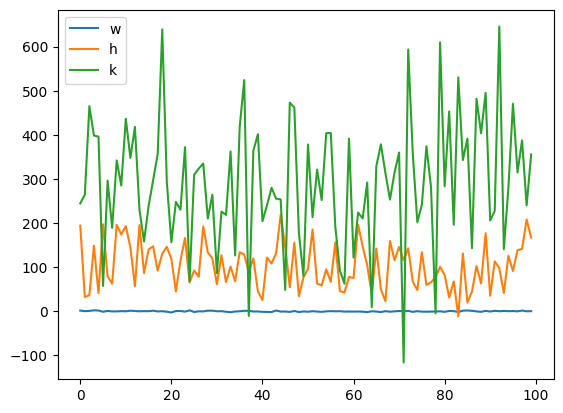

In [152]:
df[['w', 'h', 'k']].plot()
plt.show()

2. `df.plot.scatter(x='w', y='h')`  
Scatter plot of column w vs h.

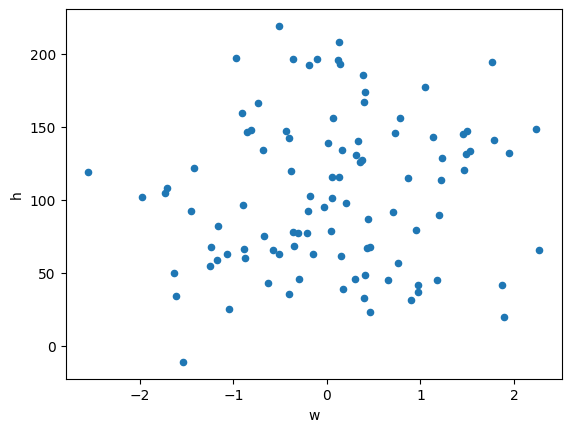

In [114]:
df.plot.scatter(x='w', y='h')
plt.show()

3. `df.plot.hist()`  
Histogram of numerical data (distribution).

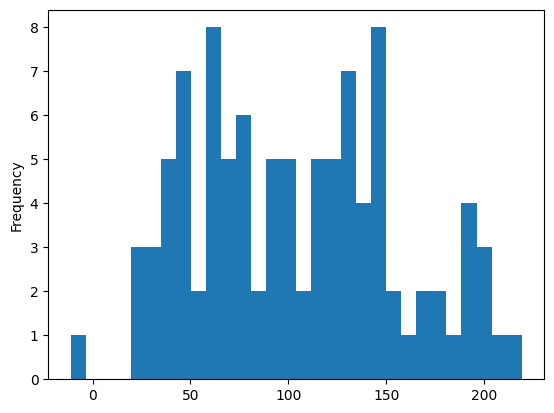

In [115]:
df['h'].plot.hist(bins=30)
plt.show()

4. `df.plot.pie()`  
Pie chart for categorical data counts.

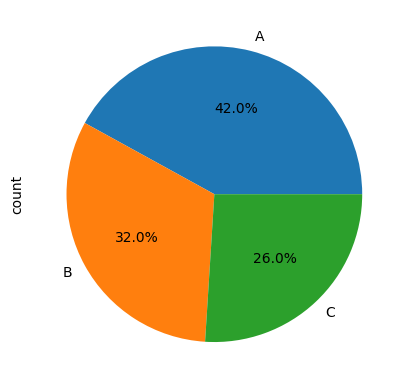

In [131]:
df['category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

5. `df.plot.bar()`  
Bar chart (categorical counts or group sums).  
Example: Sum of h by category:

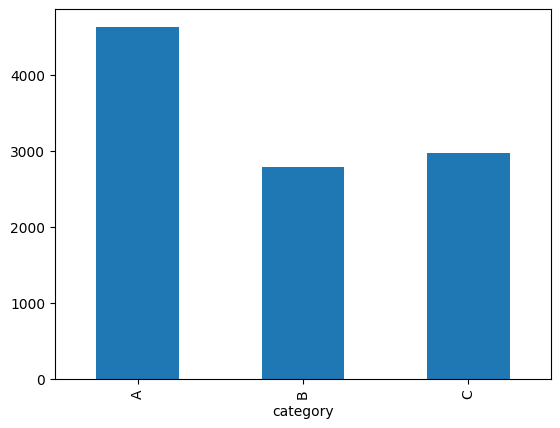

In [132]:
df.groupby('category')['h'].sum().plot.bar()
plt.show()

6. `df.plot.box()`  
Box plot to show distribution and outliers.

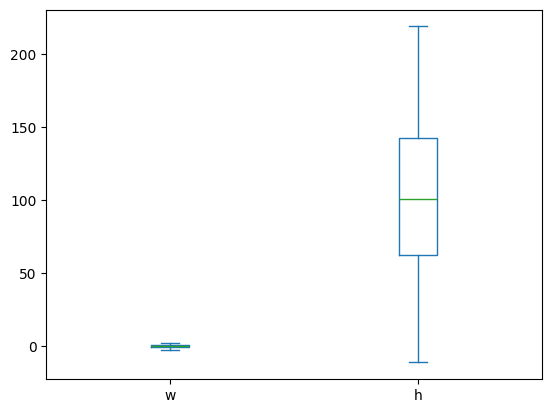

In [133]:
df[['w', 'h']].plot.box()
plt.show()


7. `df.plot.area()`  
Area chart (like line chart but filled).

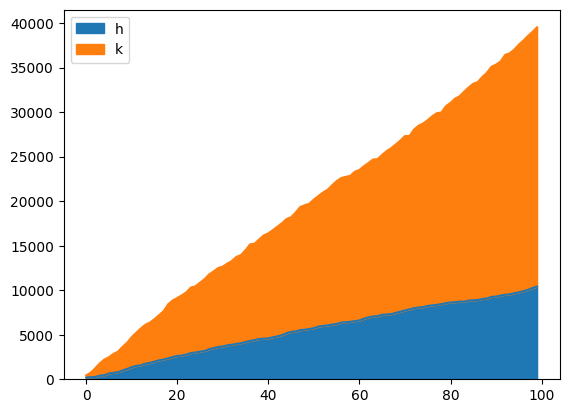

In [158]:
df[['h', 'k']].cumsum().plot.area()
plt.show()

8. `df.plot.hexbin()`  
Hexbin plot (like scatter but shows density).

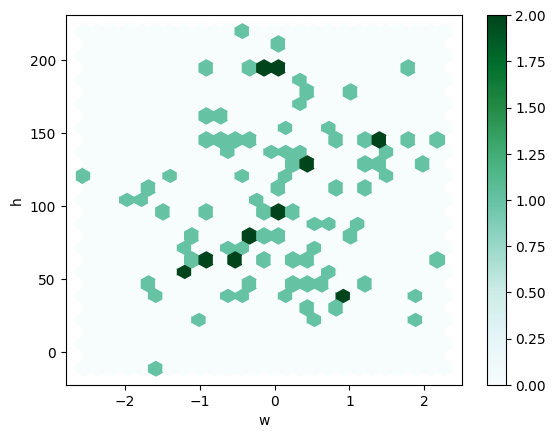

In [138]:
df.plot.hexbin(x='w', y='h', gridsize=25)
plt.show()

Additional

1. `df.plot(subplots=True)`  
Plots each column in its own separate graph (subplot).  
Useful when you want to view each variable individually.  

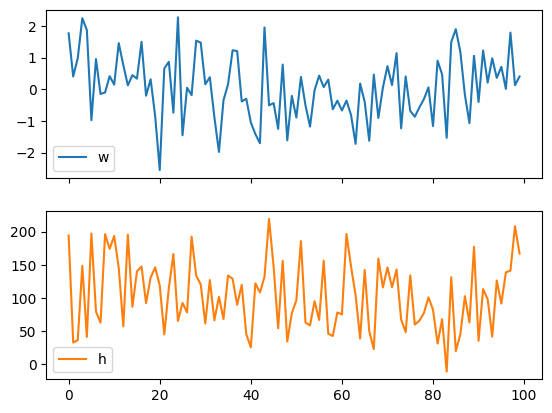

In [141]:
df[['w', 'h']].plot(subplots=True)
plt.show()

2. `df.plot(cumulative=True)`  
Plots the cumulative sum for each column.  
Useful for seeing running totals or accumulation.  

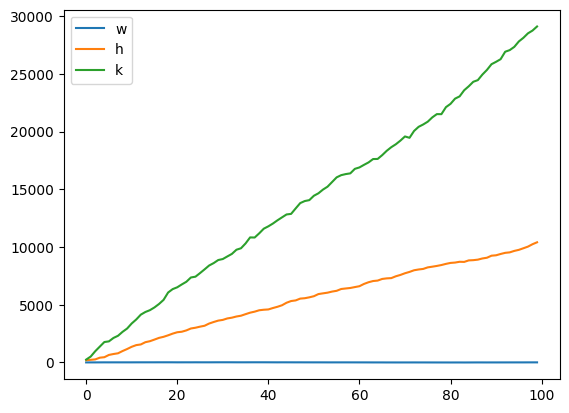

In [154]:
df[['w', 'h','k']].cumsum().plot()
plt.show()

3. `df.plot(stacked=True)`  
For bar, area, and similar charts, stacks the values on top of each other instead of overlapping.(Default)  
Shows contribution of each category cumulatively.

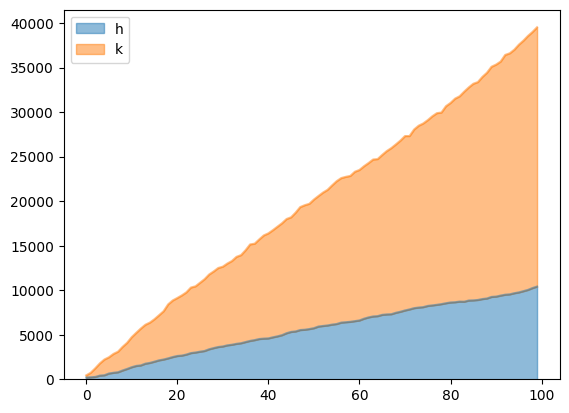

In [177]:
df[['h', 'k']].cumsum().plot.area(stacked=True, alpha=0.5)
plt.show()

`df.plot(stacked=False)`  
overlaps

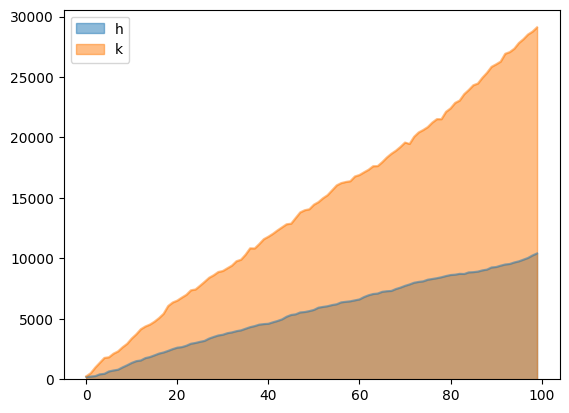

In [178]:
df[['h', 'k']].cumsum().plot.area(stacked=False, alpha=0.5)
plt.show()

4. `df.plot(bins=30)`  
For histogram plots, specifies the number of bins to divide data into.  
More bins = more detailed histogram. 

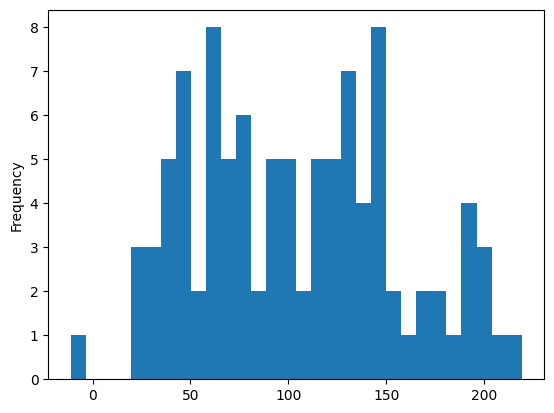

In [159]:
df['h'].plot.hist(bins=30)
plt.show()

5. `df.plot(alpha=0.5)`  
Sets transparency (opacity) of the plot to 50%.  
Useful when plotting overlapping data to better visualize density.

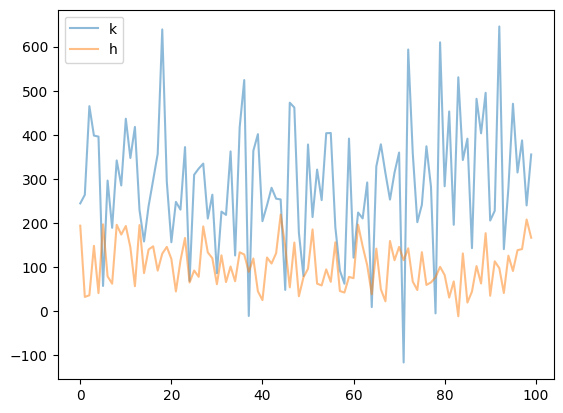

In [161]:
df[['k', 'h']].plot(alpha=0.5)
plt.show()

6. `df.plot(title="Graph of A against B")`  
Sets the title of the graph.

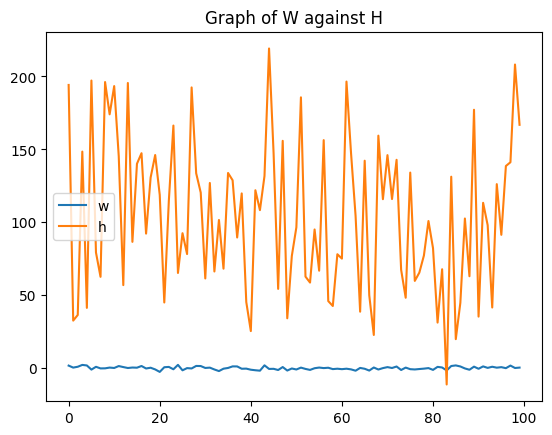

In [165]:
df[['w', 'h']].plot(title="Graph of W against H")
plt.show()

7. `df.plot(subplots=True, title=['col1', 'col2', 'col3'])`  
You can combine subplots and titles by providing a list of titles.  
Each subplot gets its corresponding title.

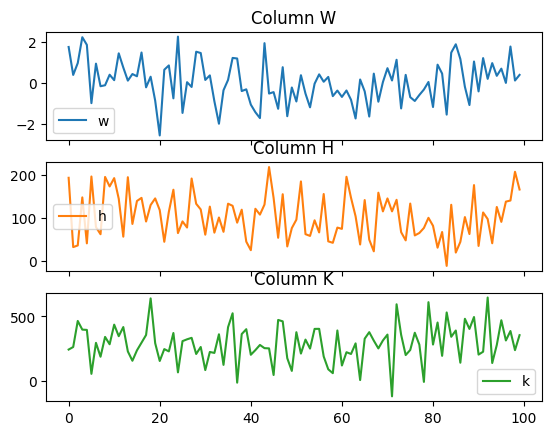

In [168]:
df.plot(subplots=True, title=['Column W', 'Column H', 'Column K'])
plt.show()

# Changing Type

1. `pd.to_numeric(data)`  

Converts data (usually strings) to numeric types (int or float). Useful when you have numbers stored as strings and want to perform math operations.

In [179]:
import pandas as pd

data = ['10', '20', '30', 'not_a_number']

# Convert with errors='coerce' to turn invalid parsing to NaN
numeric_data = pd.to_numeric(data, errors='coerce')
print(numeric_data)

[10. 20. 30. nan]


2. `pd.to_datetime(data)`  
Converts strings or other formats to pandas datetime objects.

In [182]:
import pandas as pd

dates = ['2023-01-01', '2023/02/01', 'March 3, 2023']

datetime_data = pd.to_datetime(dates, format='mixed')
print(datetime_data)

DatetimeIndex(['2023-01-01', '2023-02-01', '2023-03-03'], dtype='datetime64[ns]', freq=None)


3. `pd.to_timedelta(data)`  
Converts strings or numbers to timedelta objects (differences/durations).

In [183]:
times = ['1 days', '2 hours', '30 minutes']
timedelta_data = pd.to_timedelta(times)
print(timedelta_data)


TimedeltaIndex(['1 days 00:00:00', '0 days 02:00:00', '0 days 00:30:00'], dtype='timedelta64[ns]', freq=None)


4. `df.as_type(type)`  
Changes the datatype of a DataFrame column to the specified type (int, float, category, etc).

In [190]:
df = pd.DataFrame({'A': [1, 2, 3]})
print(df)
print(df.dtypes)
print()

df['A'] = df['A'].astype(float)
print(df.dtypes)


   A
0  1
1  2
2  3
A    int64
dtype: object

A    float64
dtype: object


5. `df.infer_objects()`  
Attempts to infer better datatypes for columns with object dtype (e.g., converts strings of numbers to numeric).

In [200]:
df = pd.DataFrame({'A': ['1', '2', '3'], 'B': ['a', 'b', 'c']})
print(df.dtypes)
print()

df = df.infer_objects()
print(df.dtypes)

A    object
B    object
dtype: object

A    object
B    object
dtype: object


6. `df.convert_dtypes()`  
Converts columns to the best possible dtype, including nullable integer, string, boolean types.

In [197]:
df = pd.DataFrame({'A': [1, 2, None], 'B': ['x', 'y', 'z']})
print(df.dtypes)
df = df.convert_dtypes()
print(df.dtypes)

A    float64
B     object
dtype: object
A             Int64
B    string[python]
dtype: object


# Datetime

In [202]:
import pandas as pd

dates = pd.Series(pd.to_datetime([
    '2023-01-15 08:30:45',
    '2024-04-10 16:45:30',
    '2025-07-20 23:59:59'
]))
dates

0   2023-01-15 08:30:45
1   2024-04-10 16:45:30
2   2025-07-20 23:59:59
dtype: datetime64[ns]

`dates.dt.year`		Extract the year as integer	  
`dates.dt.month`	Extract the month as integer  
`dates.dt.day`		Extract the day as integer  
`dates.dt.quarter`	Find which quarter the date lies in: 	1 (for Jan-Mar)  
`dates.dt.hour`		Extract the hour  
`dates.dt.minute`	Extract the minute  
`dates.dt.second`	Extract the second  	

In [204]:
print("Year:\n", dates.dt.year)
print("Month:\n", dates.dt.month)
print("Day:\n", dates.dt.day)
print("Quarter:\n", dates.dt.quarter)
print("Hour:\n", dates.dt.hour)
print("Minute:\n", dates.dt.minute)
print("Second:\n", dates.dt.second)

Year:
 0    2023
1    2024
2    2025
dtype: int32
Month:
 0    1
1    4
2    7
dtype: int32
Day:
 0    15
1    10
2    20
dtype: int32
Quarter:
 0    1
1    2
2    3
dtype: int32
Hour:
 0     8
1    16
2    23
dtype: int32
Minute:
 0    30
1    45
2    59
dtype: int32
Second:
 0    45
1    30
2    59
dtype: int32


# Mapping

1. `s.map(lambda x: 2 * x)`  
Applies a function to each element in a Series.  
Returns a new Series with the function applied element-wise.

In [207]:
import pandas as pd

s = pd.Series([1, 2, 3, 4])
doubled = s.map(lambda x: 2 * x)
print(doubled)

0    2
1    4
2    6
3    8
dtype: int64


2. `df.apply(lambda s: s.max() - s.min(), axis=1)`  
Applies a function along an axis of a DataFrame.  
Here, the function calculates the range (max - min) of each row.  
axis=1 means apply the function to each row.

In [208]:
df = pd.DataFrame({
    'A': [1, 4, 3],
    'B': [5, 2, 6],
    'C': [3, 8, 9]
})
print(df)
print()

range_per_row = df.apply(lambda s: s.max() - s.min(), axis=1)
print(range_per_row)


   A  B  C
0  1  5  3
1  4  2  8
2  3  6  9

0    4
1    6
2    6
dtype: int64


# Series String Operations  
Similar to python string operations, except these are vectorized to apply to the
entire Series efficiently

In [210]:
import pandas as pd

s = pd.Series(['hello world', 'pandas STRING', '123abc', 'test123'])
s

0      hello world
1    pandas STRING
2           123abc
3          test123
dtype: object

1. `s.str.count(pattern)`  
Counts occurrences of pattern in each string element.

In [211]:
counts = s.str.count('a')
print(counts)

0    0
1    2
2    1
3    0
dtype: int64


2. `s.str.get(index)`  
Extracts the character at position `index` from each string.

In [212]:
chars = s.str.get(0)
print(chars)

0    h
1    p
2    1
3    t
dtype: object


3. `s.str.join(sep)`  
Joins elements of each string using separator sep.  
(Note: Usually used when each element contains a list of strings)

In [213]:
s2 = pd.Series([['a', 'b'], ['c', 'd'], ['e']])
joined = s2.str.join('-')
print(joined)

0    a-b
1    c-d
2      e
dtype: object


4. `s.str.title()`  
Capitalizes the first letter of each word.

In [214]:
titles = s.str.title()
print(titles)

0      Hello World
1    Pandas String
2           123Abc
3          Test123
dtype: object


5. `s.str.len()`  
Returns length of each string.

In [215]:
lengths = s.str.len()
print(lengths)

0    11
1    13
2     6
3     7
dtype: int64


6. `s.str.cat()`  
Concatenates all strings into one string.

In [216]:
concatenated = s.str.cat(sep=', ')
print(concatenated)

hello world, pandas STRING, 123abc, test123


7. `s.str.partition(sep)`  
Splits each string at the first occurrence of sep, returns three parts.

In [217]:
partitioned = s.str.partition(' ')
print(partitioned)

         0  1       2
0    hello      world
1   pandas     STRING
2   123abc           
3  test123           


8. `s.str.slice(start, stop, step)`  
Slices each string like Python slicing.

In [218]:
sliced = s.str.slice(0, 5)
print(sliced)

0    hello
1    panda
2    123ab
3    test1
dtype: object


9. `s.str.replace(pat, rep)`  
Replaces substring or regex pattern pat with rep.

In [219]:
replaced = s.str.replace('123', 'XYZ', regex=False)
print(replaced)

0      hello world
1    pandas STRING
2           XYZabc
3          testXYZ
dtype: object


10. `s.str.isalnum()`  
Checks if each string consists only of alphanumeric characters.

In [220]:
isalnum = s.str.isalnum()
print(isalnum)

0    False
1    False
2     True
3     True
dtype: bool
